In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikitayamkin","key":"16e471b24fd6e262801175680e4c3a88"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uciml/german-credit
!unzip "german-credit.zip"

Dataset URL: https://www.kaggle.com/datasets/uciml/german-credit
License(s): DbCL-1.0
  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 16.4MB/s]
Archive:  german-credit.zip
  inflating: german_credit_data.csv  


In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('german_credit_data.csv').iloc[:, 1:]
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [7]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Исходный набор данных содержит 1000 записей с 20 категориальными/символьными атрибутами. В этом наборе данных каждая запись представляет человека, который берет кредит в банке. Каждое лицо классифицируется как подверженное хорошему или плохому кредитному риску в соответствии с набором атрибутов.

1. **Age** (numeric) - возраст
2. **Sex** (text: male, female) - пол
3. **Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) -
4. **Housing** (text: own, rent, or free) - имущество
5. **Saving accounts** (text - little, moderate, quite rich, rich) - накопительный счет
6. **Checking account** (text - little, moderate, rich) - текущий счет
7. **Credit amount** (numeric, in DM) - сумма кредита
8. **Duration** (numeric, in month) - срок
9. **Purpose** (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others) - цель кредита

In [9]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [10]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [11]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

### Exploratory Data Analysis (EDA)

##### Age

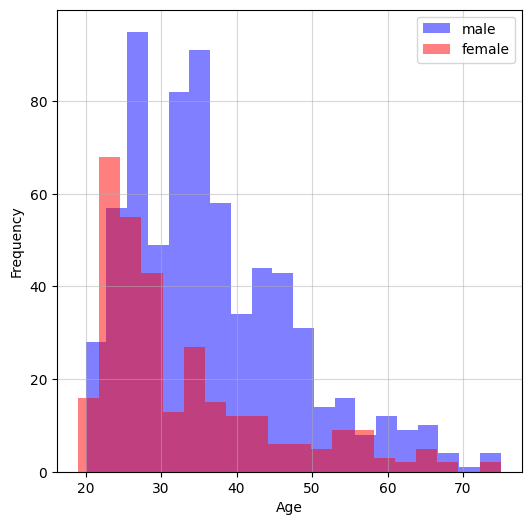

In [12]:
x_col = df['Age'].values
y_col = df['Sex'].values

plt.figure(figsize=(6,6))
plt.grid(alpha = 0.5)
# plt.hist(df['Age'], bins = 20)
plt.hist(x_col[y_col == 'male'], bins = 20, color='b', alpha=0.5, label='male')
plt.hist(x_col[y_col == 'female'], bins = 20, color='r', alpha=0.5, label='female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### Job

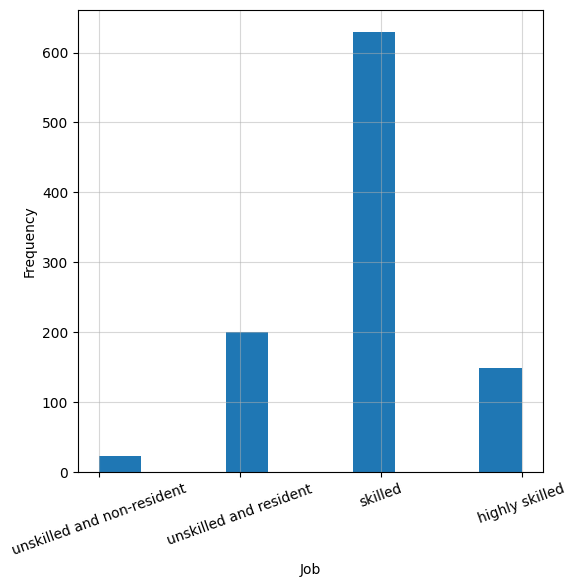

In [13]:
plt.figure(figsize=(6,6))
plt.grid(alpha = 0.5)
plt.hist(df['Job'], bins = 10)
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.xticks(ticks = [0, 1, 2, 3], labels = ['unskilled and non-resident', 'unskilled and resident', 'skilled', 'highly skilled'], rotation=20)
# plt.legend()
plt.show()

##### Credit amount

In [14]:
df['Duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

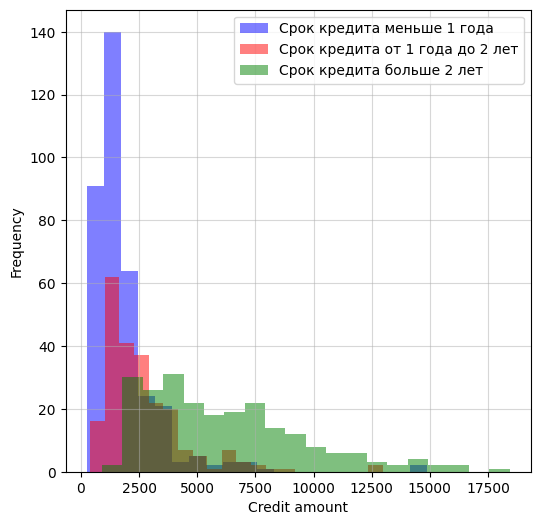

In [15]:
x_col = df['Credit amount'].values
y_col = df['Duration'].values

plt.figure(figsize=(6,6))
plt.grid(alpha = 0.5)
plt.hist(x_col[y_col <= 12], bins = 20, color='b', alpha=0.5, label='Срок кредита меньше 1 года')
plt.hist(x_col[(y_col > 12) & (y_col < 24)], bins = 20, color='r', alpha=0.5, label='Срок кредита от 1 года до 2 лет')
plt.hist(x_col[y_col > 24], bins = 20, color='g', alpha=0.5, label='Срок кредита больше 2 лет')
plt.xlabel('Credit amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### Histograms

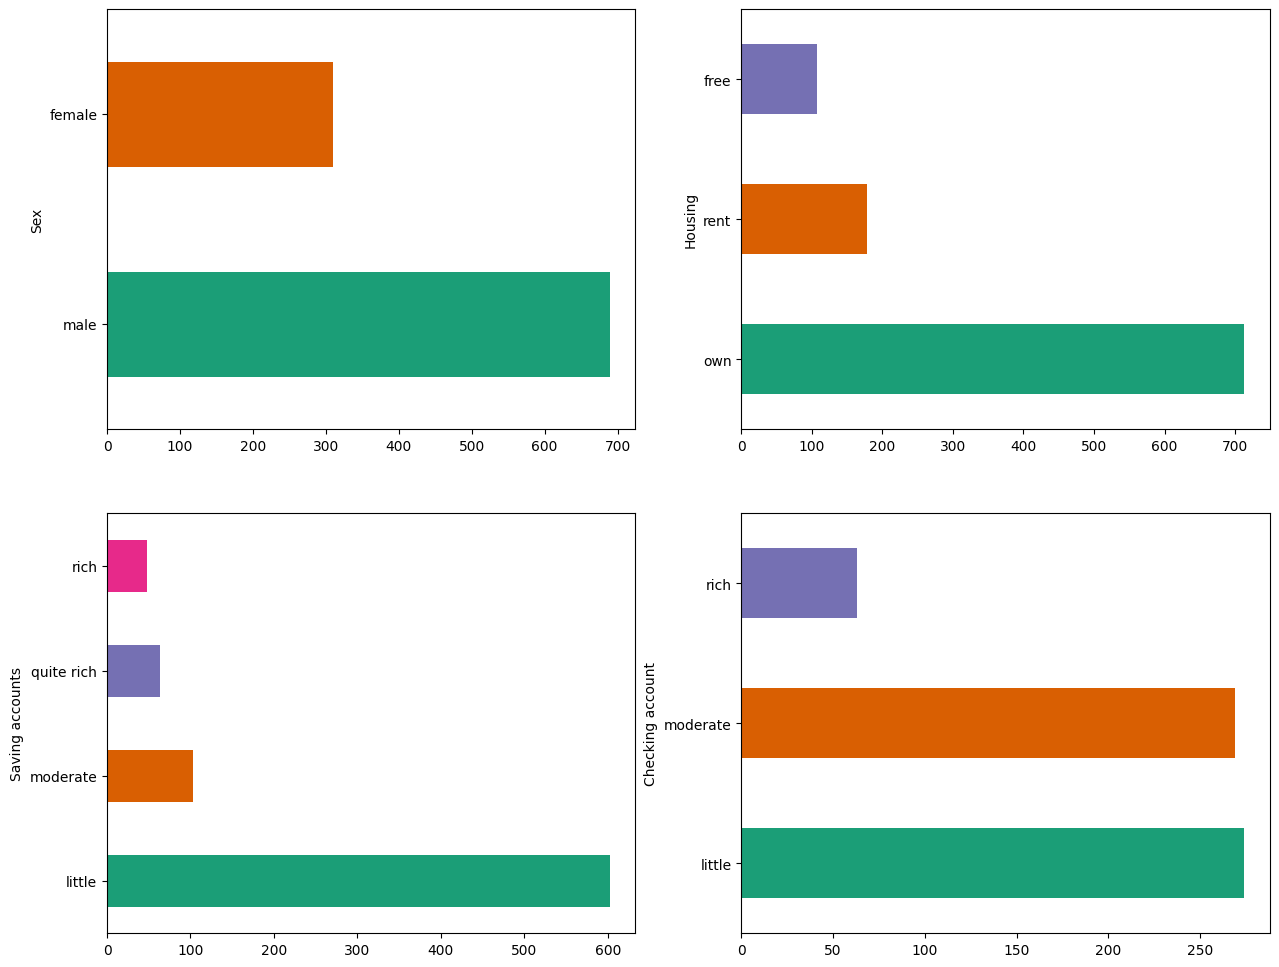

In [16]:
columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account']
plt.figure(figsize=(15, 12))

for index, column in enumerate(columns):
  plt.subplot(2, 2, index + 1)
  df[column].value_counts().plot(kind = 'barh', color=sns.palettes.mpl_palette('Dark2'))

##### Purpose

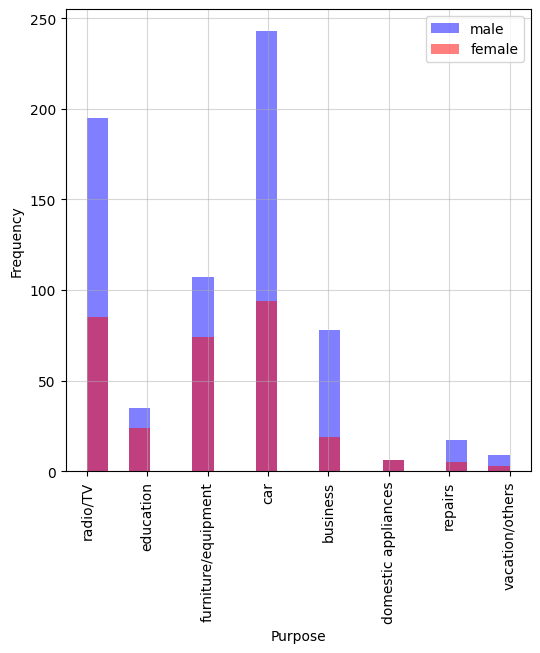

In [17]:
x_col = df['Purpose'].values
y_col = df['Sex'].values

plt.figure(figsize=(6,6))
plt.grid(alpha = 0.5)

plt.hist(x_col[y_col == 'male'], bins = 20, color='b', alpha=0.5, label='male')
plt.hist(x_col[y_col == 'female'], bins = 20, color='r', alpha=0.5, label='female')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()
plt.show()

##### Correlation

<Axes: >

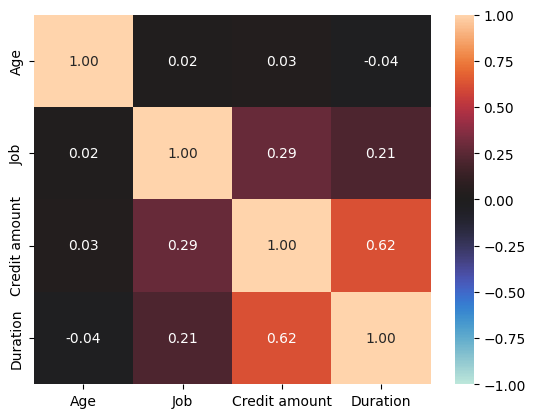

In [18]:
sns.heatmap(df[['Age', 'Job', 'Credit amount', 'Duration']].corr(), vmin=-1, vmax=1, center = 0, annot =True, fmt = '.2f')

### Data Preprocessing

In [19]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

In [20]:
# наиболее часто встречающееся значение категориальной переменной
# df['Saving accounts'].mode()

([<matplotlib.patches.Wedge at 0x7d1f8406a5f0>,
 [Text(-0.34976324878399084, 1.042912110295047, 'little'),
  Text(-0.37586142011728374, -1.0337931093151176, 'unknown'),
  Text(0.5747483245933211, -0.9379042399825104, 'moderate'),
  Text(0.9655973572668963, -0.5268982289201455, 'quite rich'),
  Text(1.0875169035234493, -0.1652482512790046, 'rich')],
 [Text(-0.1907799538821768, 0.5688611510700256, '60.3%'),
  Text(-0.2050153200639729, -0.5638871505355186, '18.3%'),
  Text(0.3134990861418115, -0.5115841308995511, '10.3%'),
  Text(0.5266894676001252, -0.28739903395644295, '6.3%'),
  Text(0.5931910382855177, -0.09013540978854796, '4.8%')])

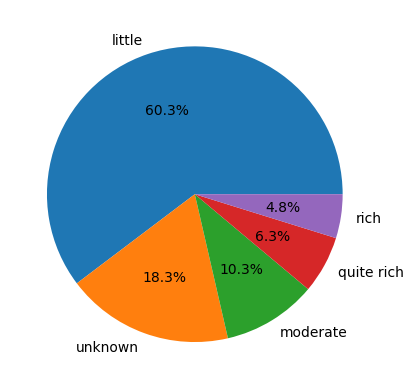

In [21]:
plt.pie(df['Saving accounts'].value_counts(), labels = df['Saving accounts'].value_counts().index, autopct='%1.1f%%',)

In [22]:
# df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode())

In [23]:
# df['Checking account'].mode()

([<matplotlib.patches.Wedge at 0x7d1f880c72e0>,
 [Text(0.35957685286539076, 1.0395693756952546, 'unknown'),
  Text(-1.079199584815568, -0.21290433563905198, 'little'),
  Text(0.35630902750392035, -1.0406939400799886, 'moderate'),
  Text(1.0785253546453721, -0.2162939189784923, 'rich')],
 [Text(0.19613282883566766, 0.5670378412883206, '39.4%'),
  Text(-0.5886543189903097, -0.11612963762130106, '27.4%'),
  Text(0.194350378638502, -0.5676512400436301, '26.9%'),
  Text(0.5882865570792938, -0.11797850126099577, '6.3%')])

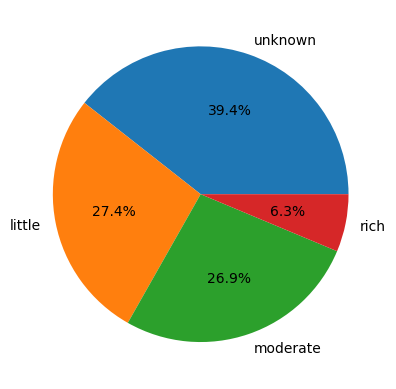

In [24]:
plt.pie(df['Checking account'].value_counts(), labels = df['Checking account'].value_counts().index, autopct='%1.1f%%',)

In [25]:
# df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode())

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_parameters = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for parameter in categorical_parameters:
  label_encoder = LabelEncoder()
  df[parameter] = label_encoder.fit_transform(df[parameter])

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,3,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


#### Нормализация

Алгоритмы кластеризации основываются на вычислении расстояний между точками. Если данные будут иметь разные масштабы (например, одна переменная в километрах, а другая в метрах), то переменная с большими значениями будет иметь непропорционально большее влияние на расстояния между точками. Это может привести к неправильной интерпритации кластеров.

<Axes: >

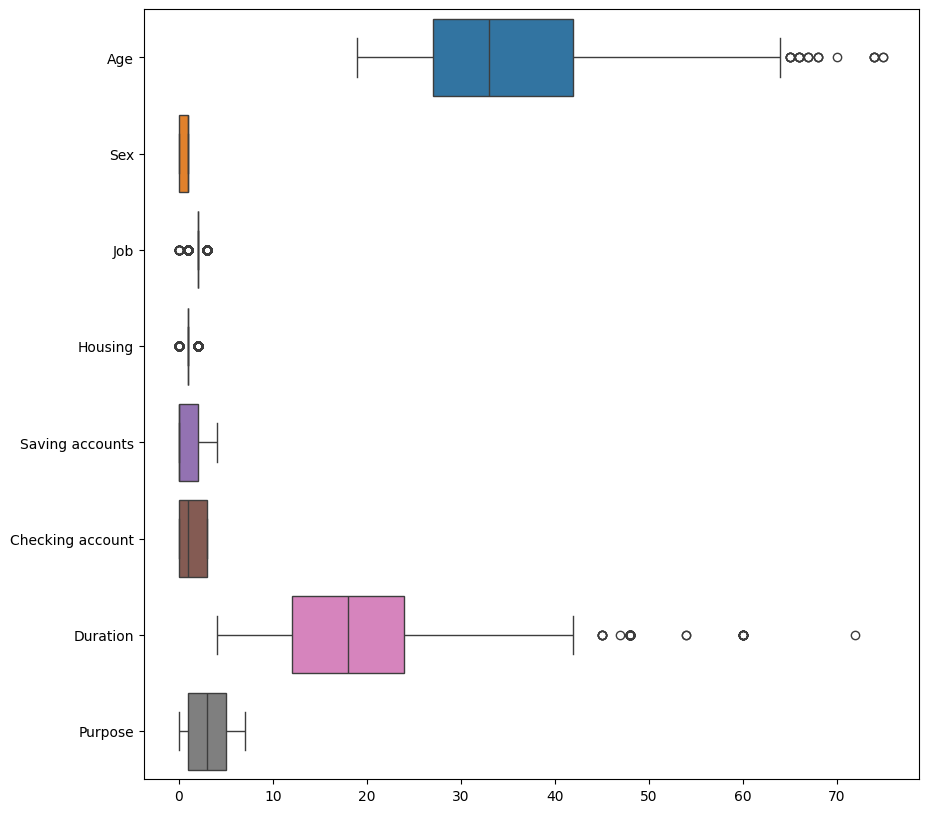

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df.drop(columns = 'Credit amount'), orient = 'h')

In [29]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# scaled_data = scaler.fit_transform(df)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

In [31]:
scaled_data.shape

(1000, 9)

In [32]:
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)
scaled_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.857143,1.0,0.666667,0.5,1.0,0.000000,0.050567,0.029412,0.714286
1,0.053571,0.0,0.666667,0.5,0.0,0.333333,0.313690,0.647059,0.714286
2,0.535714,1.0,0.333333,0.5,0.0,1.000000,0.101574,0.117647,0.428571
3,0.464286,1.0,0.666667,0.0,0.0,0.000000,0.419941,0.558824,0.571429
4,0.607143,1.0,0.666667,0.0,0.0,0.000000,0.254209,0.294118,0.142857


<Axes: >

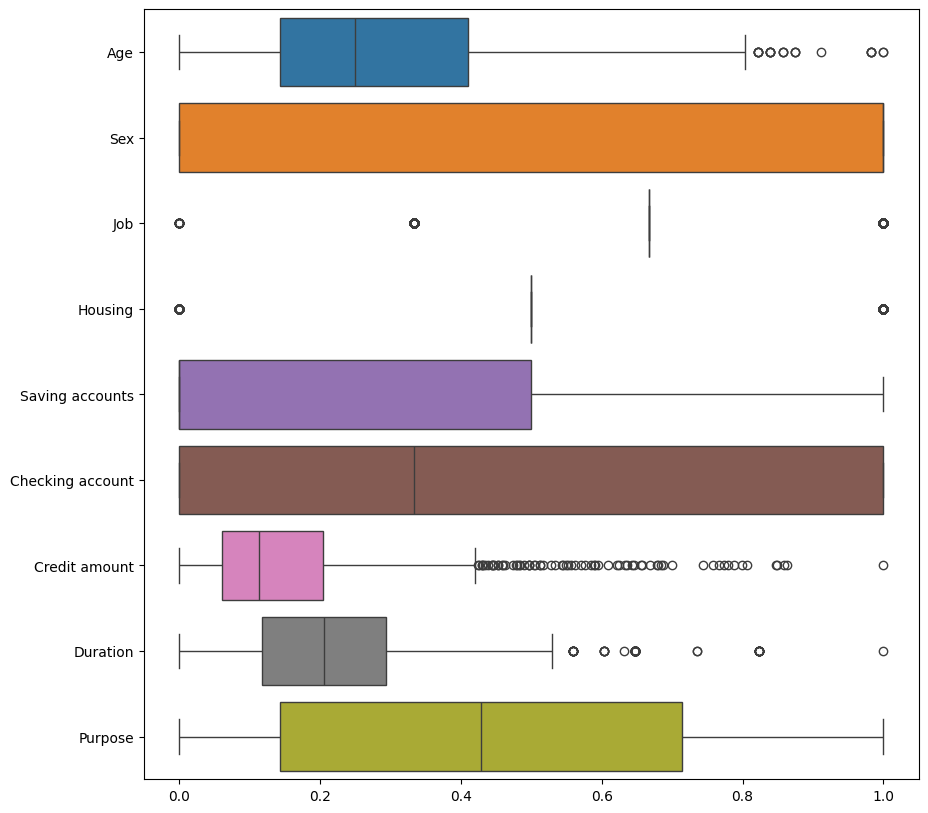

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(scaled_df, orient = 'h')

#### Уменьшение размерности данных и визуализация

In [34]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP

In [36]:
tsne = TSNE(n_components=2, random_state=10)
tsne_data = tsne.fit_transform(scaled_df)
type(tsne_data), tsne_data.shape

(numpy.ndarray, (1000, 2))

In [37]:
pca = PCA(n_components=2, random_state=10)
pca_data = pca.fit_transform(scaled_df)
type(pca_data), pca_data.shape

(numpy.ndarray, (1000, 2))

In [38]:
umap = UMAP(n_components=2, random_state=10)
umap_data = umap.fit_transform(scaled_df)
type(umap_data), umap_data.shape

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(numpy.ndarray, (1000, 2))

In [39]:
def plot_clusters(tsne_data, pca_data, umap_data, title=None, hue=None):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=hue, palette='rainbow', s=12)
    plt.title('TSNE')

    plt.subplot(1, 3, 2)
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=hue, palette='rainbow', s=12)
    plt.title('PCA')

    plt.subplot(1, 3, 3)
    sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=hue, palette='rainbow', s=12)
    plt.title('UMAP')

    plt.suptitle(title)

    # plt.tight_layout()
    plt.show()

<ipython-input-39-329c477d8d5c>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=hue, palette='rainbow', s=12)
<ipython-input-39-329c477d8d5c>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=hue, palette='rainbow', s=12)
<ipython-input-39-329c477d8d5c>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=hue, palette='rainbow', s=12)


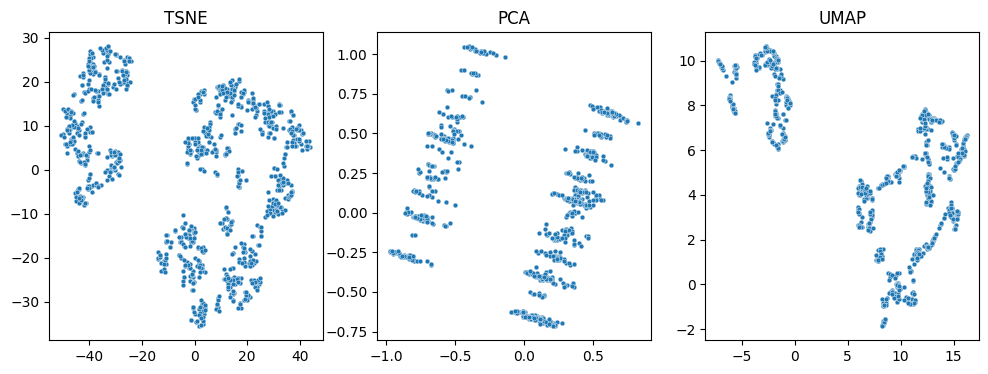

In [40]:
plot_clusters(tsne_data, pca_data, umap_data)

### Кластеризация

#### Kmeans

Давайте разберёмся, как работает алгоритм кластеризации K-means, шаг за шагом.

1. Выбор числа кластеров (K):
   - Сначала вы должны определить, на сколько кластеров вы хотите разбить данные. Например, вы можете выбрать 3 кластера (K=3).

2. Инициализация центроидов:
   - Затем алгоритм случайным образом выбирает K точек из ваших данных. Эти точки называются центроидами и представляют собой "центры" кластеров.

3. Присвоение точек к кластерам:
   - Для каждой точки данных алгоритм вычисляет расстояние до каждого из K центроидов и присваивает точку тому кластеру, центроид которого находится ближе всего.

4. Обновление центроидов:
   - После того как все точки присвоены кластерам, алгоритм пересчитывает местоположение каждого центроида. Это делается путём нахождения среднего значения всех точек, которые были присвоены данному кластеру.

    - Например, для кластера, содержащего три точки с координатами:
    - Точка A (2, 3)
    - Точка B (4, 7)
    - Точка C (6, 5)
  - Среднее значение для x-координат будет: (2 + 4 + 6) / 3 = 4
  - Среднее значение для y-координат будет: (3 + 7 + 5) / 3 = 5
  - Следовательно, новый центроид для этого кластера станет (4, 5).

5. Повторение:
   - Шаги 3 и 4 повторяются: точки снова присваиваются кластерам в зависимости от новых центроидов, затем центроиды обновляются. Этот процесс продолжается до тех пор, пока центроиды не перестанут значительно перемещаться, или пока не будет достигнуто заданное количество итераций.

6. Завершение:
   - Как только алгоритм завершится, вы получите итоговые кластеры, причём каждая точка данных будет принадлежать к ближайшему к ней кластеру.

В итоге, K-means помогает разделить данные на группы, основываясь на их сходстве, и позволяет легче анализировать и визуализировать информацию.

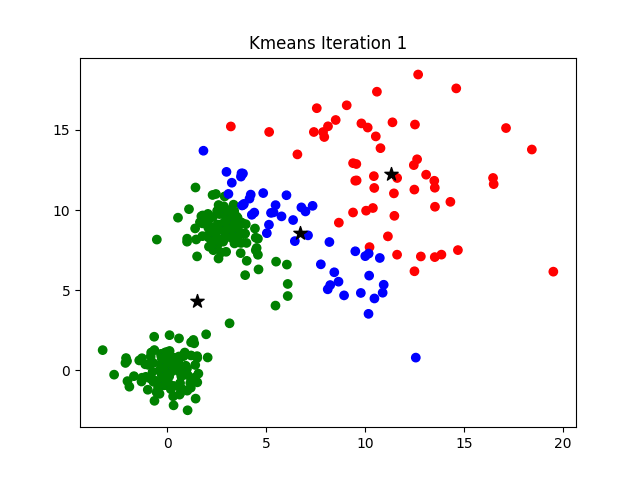

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Инерция (функция потерь)
inertia = []
s_score = []

for i in range(2, 11):
  model = KMeans(n_clusters = i, n_init = 'auto',  random_state=10)
  model.fit(scaled_df)
  inertia.append(model.inertia_)

  predictions = model.predict(scaled_df)
  silhouette = silhouette_score(scaled_df, predictions)
  s_score.append(silhouette)

In [42]:
# print(len(inertia))
# print(len(s_score))

##### Elbow method (метод "локтя")

 Метод заключается в поиске точки излома («локтя») на графике зависимости ошибки (инерции) от количества кластеров, которая указывает на оптимальное число кластеров. Оптимальным
k
 будет то, при котором ошибка перестает существенно уменьшаться, т.е. начинает сглаживаться.

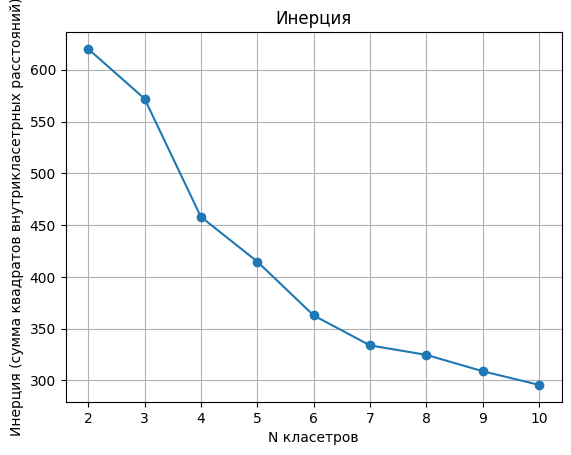

In [43]:
plt.title('Инерция')
plt.ylabel('Инерция (сумма квадратов внутрикласетрных расстояний)')
plt.xlabel('N класетров')
plt.plot(range(2, 11), inertia, marker = 'o')
plt.grid()

In [44]:
# Переломный момент
D = []
for i in range(1,8):
  Di = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
  D.append(Di)
D

[2.374673113663835,
 0.37806431497564436,
 1.2057372392374794,
 0.5551263143886107,
 0.3184535146150442,
 1.7161573686933205,
 0.8377693104365226]

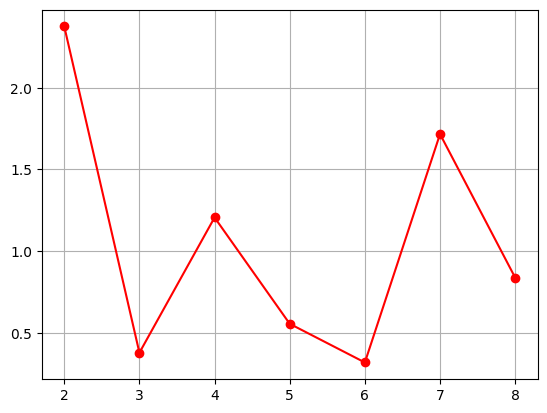

In [45]:
plt.plot(range(2, 9), D, marker = 'o', color = 'red')
plt.grid()

##### Silhouette score

Коэффициент силуэта в кластеризации — это величина, которая позволяет оценить степень соответствия построенной кластерной структуры обучающим данным, т.е. оценить качество кластеризации. Иными словами, коэффициент силуэта показывает, насколько каждый объект «похож» на другие объекты в том кластере, в который он был распределен в процессе кластеризации, и «не похож» на объекты из других кластеров. Метод был предложен бельгийским статистиком Питером Руссо в 1987 году.

Силуэт колеблется от −1 до +1, где высокое значение указывает на то, что объект хорошо соответствует своему кластеру и плохо соответствует соседним кластерам . Если большинство объектов имеют высокое значение, то конфигурация кластеризации является подходящей.

sklearn считает средний коэффициент силуэта для всего датасета.

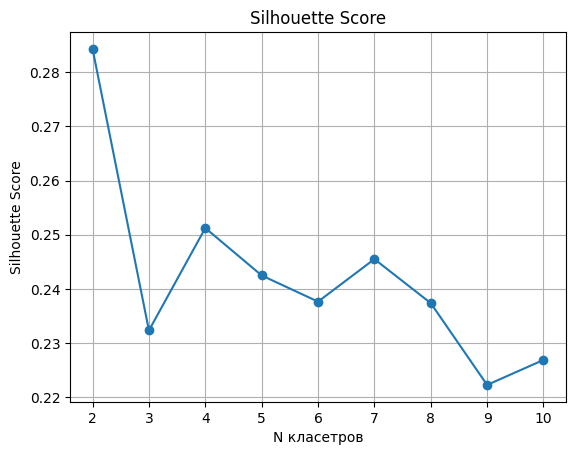

In [46]:
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('N класетров')
plt.plot(range(2, 11), s_score, marker = 'o')
plt.grid()

Видим графику, что скор имеет наибольшее значение при 2 и 4 кластерах.

##### Kmeans vizualization

Визулизируем случаи с 3, 5 и 6 кластерами.

In [47]:
kmeans_3_cl = KMeans(n_clusters = 3, random_state=10, n_init='auto')
kmeans_3_cl.fit(scaled_df)
labels_kmeans_3_cl = kmeans_3_cl.labels_

In [48]:
kmeans_4_cl = KMeans(n_clusters = 4, random_state=10, n_init='auto')
kmeans_4_cl.fit(scaled_df)
labels_kmeans_4_cl = kmeans_4_cl.labels_

In [49]:
kmeans_5_cl = KMeans(n_clusters = 5, random_state=10, n_init='auto')
kmeans_5_cl.fit(scaled_df)
labels_kmeans_5_cl = kmeans_5_cl.labels_

In [50]:
kmeans_6_cl = KMeans(n_clusters = 6, random_state=10, n_init='auto')
kmeans_6_cl.fit(scaled_df)
labels_kmeans_6_cl = kmeans_6_cl.labels_

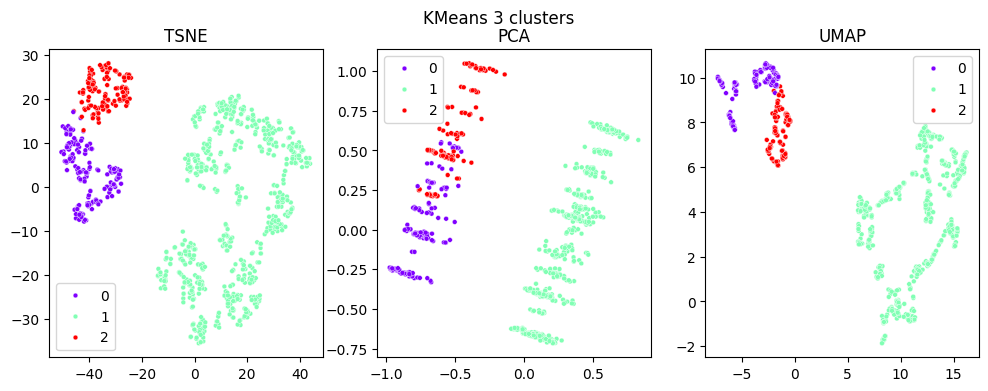

In [51]:
plot_clusters(tsne_data, pca_data, umap_data, title='KMeans 3 clusters', hue=labels_kmeans_3_cl)

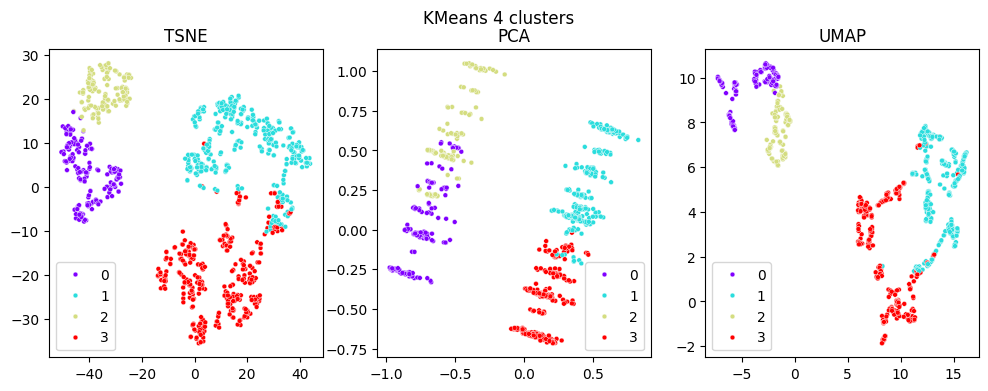

In [52]:
plot_clusters(tsne_data, pca_data, umap_data, title='KMeans 4 clusters', hue=labels_kmeans_4_cl)

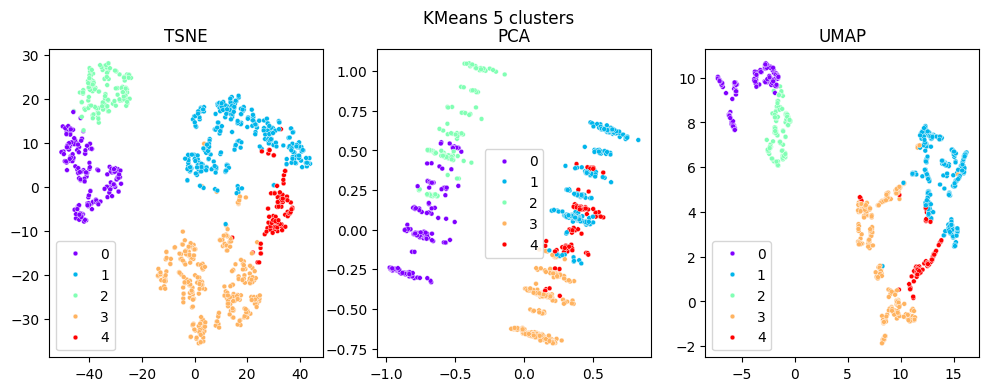

In [53]:
plot_clusters(tsne_data, pca_data, umap_data, title='KMeans 5 clusters', hue=labels_kmeans_5_cl)

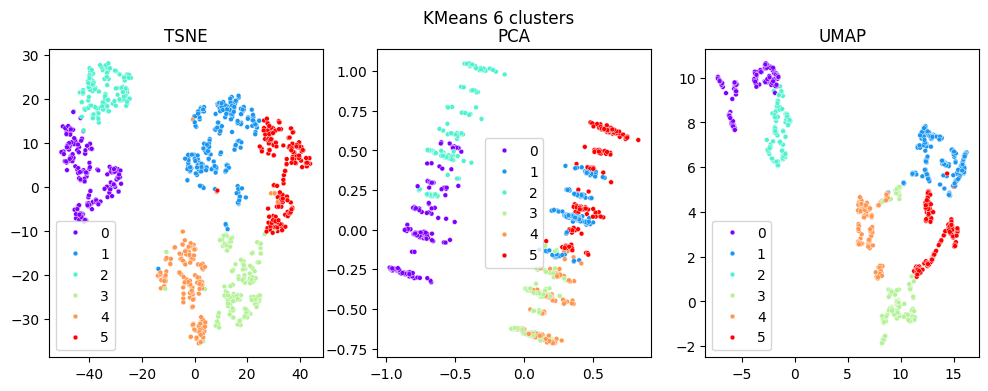

In [54]:
plot_clusters(tsne_data, pca_data, umap_data, title='KMeans 6 clusters', hue=labels_kmeans_6_cl)

С субъективной точки зрения, 6 кластеров - наиболее оптимальный вариант.

#### Hierarhical Clustering (Agglomerative)

Иерархическая аггломеративная кластеризация — это метод, который позволяет группировать данные в иерархическую структуру. Рассмотрим его работу шаг за шагом.

1. Инициализация:
   - Каждый объект (точка данных) начинается как отдельный кластер. Если у вас есть N объектов, вы начинаете с N кластеров.

2. Вычисление расстояний:
   - Вычисляется расстояние между всеми парами кластеров. Обычно используют метрики расстояния, такие как евклидово расстояние.

3. Слияние кластеров:
   - Находится пара кластеров с наименьшим расстоянием между ними. Эти два кластера объединяются в один новый кластер.

4. Обновление расстояний:
   - После слияния вы пересчитываете расстояния между новым кластером и остальными кластерами. Существует несколько методов для этого:
     - Метод ближайшего соседа (single-linkage): расстояние между кластерами определяется как минимальное расстояние между их точками.
     - Метод дальнего соседа (complete-linkage): расстояние — это максимальное расстояние между точками разных кластеров.
     - Метод средней связи (average-linkage): расстояние — это среднее расстояние между всеми парами точек из разных кластеров.

5. Повторение:
   - Шаги 3 и 4 повторяются, пока все кластеры не будут объединены в один (или пока не будет достигнуто заданное количество кластеров).

6. Дерево (дендограмма):
   - По мере объединения кластеров можно построить дендограмму — график, который показывает, как кластеры были объединены и на каком уровне. Это помогает визуализировать иерархическую структуру кластеров.

7. Определение итоговых кластеров:
   - На основе дендограммы вы можете выбрать уровень слияния, который вас интересует, и на его основе определить финальные кластеры.

Таким образом, аггломеративная иерархическая кластеризация создает иерархию кластеров, формируя более крупные кластеры из меньших, что позволяет глубже анализировать структуру данных.

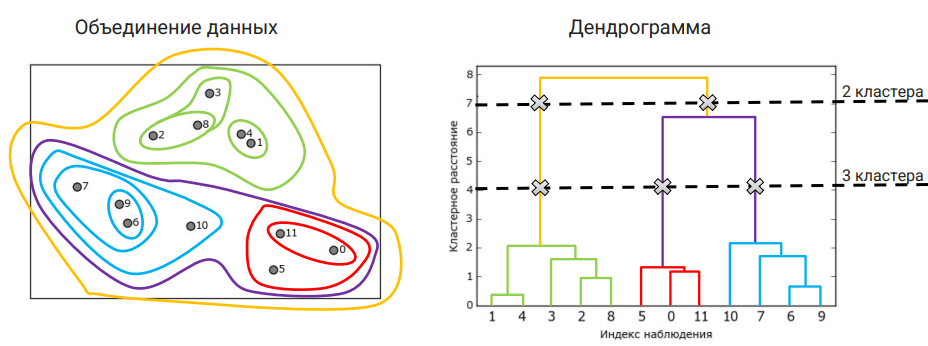

In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
s_score = []

for i in range(2, 11):
  model = AgglomerativeClustering(n_clusters=i)
  model.fit(scaled_df)

  predictions = model.fit_predict(scaled_df)

  silhouette = silhouette_score(scaled_df, predictions)
  s_score.append(silhouette)

##### Silhouette Score

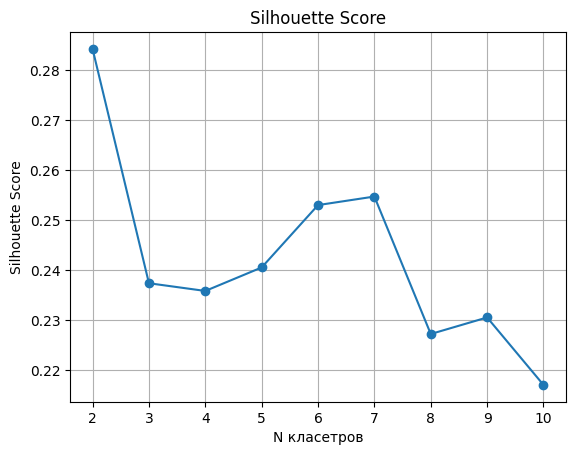

In [57]:
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('N класетров')
plt.plot(range(2, 11), s_score, marker = 'o')
plt.grid()

Наибольшие значения silhouette score при n_clusters равном 2, 6 и 7.

##### Dendogramm

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

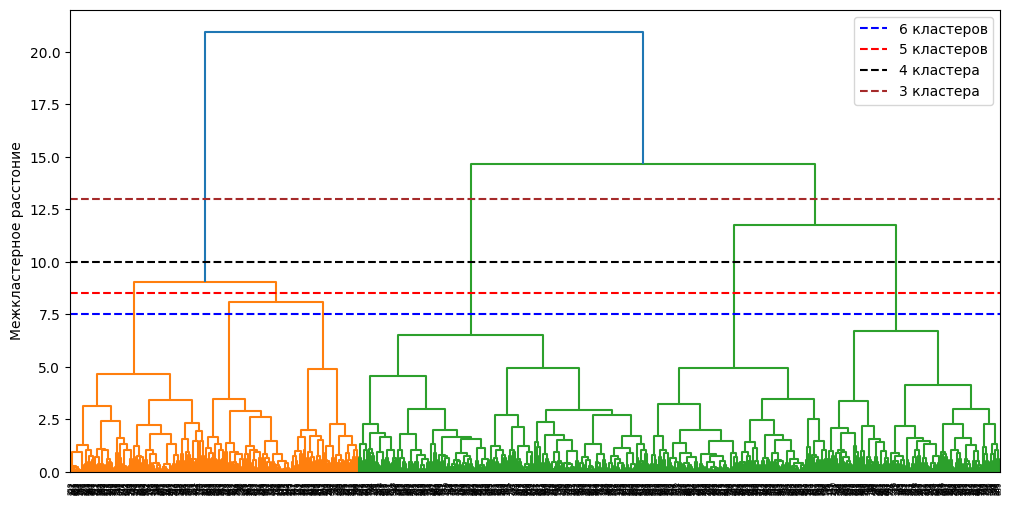

In [59]:
plt.figure(figsize = (12, 6))
linkage = linkage(scaled_df, method = 'ward')
dendrogram = dendrogram(linkage)
plt.axhline(y = 7.5, color = 'blue' ,linestyle='--', label='6 кластеров')
plt.axhline(y = 8.5, color = 'red', linestyle='--', label='5 кластеров')
plt.axhline(y = 10, color = 'black', linestyle='--', label='4 кластера')
plt.axhline(y = 13, color = 'brown', linestyle='--', label='3 кластера')
plt.ylabel('Межкластерное расстоние')
plt.legend()
plt.show()

По оси Y на дендограмме отображается межкластерное расстояние. Это расстояние показывает, насколько далеко друг от друга находятся кластеры в пространстве признаков.

Когда два кластера объединяются, на дендограмме вы увидите горизонтальную линию, которая поднимается до высоты, соответствующей расстоянию объединения этих кластеров. Чем выше эта линия, тем более различны объединяемые кластеры, что указывает на то, что они менее похожи друг на друга.

Если нужно определить оптимальное количество кластеров, вы можете использовать "рязь" на дендограмме: когда вы видите значительное изменение в расстоянии (например, большие промежутки между линиями), это может быть показателем естественного разбиения на кластеры.

In [60]:
hierarchical_3_cl = AgglomerativeClustering(n_clusters = 3)
hierarchical_3_cl.fit(scaled_df)
labels_hierarchical_3_cl = hierarchical_3_cl.labels_

In [61]:
hierarchical_4_cl = AgglomerativeClustering(n_clusters = 4)
hierarchical_4_cl.fit(scaled_df)
labels_hierarchical_4_cl = hierarchical_4_cl.labels_

In [62]:
hierarchical_5_cl = AgglomerativeClustering(n_clusters = 5)
hierarchical_5_cl.fit(scaled_df)
labels_hierarchical_5_cl = hierarchical_5_cl.labels_

In [63]:
hierarchical_6_cl = AgglomerativeClustering(n_clusters = 6)
hierarchical_6_cl.fit(scaled_df)
labels_hierarchical_6_cl = hierarchical_6_cl.labels_

In [64]:
hierarchical_7_cl = AgglomerativeClustering(n_clusters = 7)
hierarchical_7_cl.fit(scaled_df)
labels_hierarchical_7_cl = hierarchical_7_cl.labels_

In [65]:
# labels_hierarchical_6_cl

##### Hierarchical vizualization

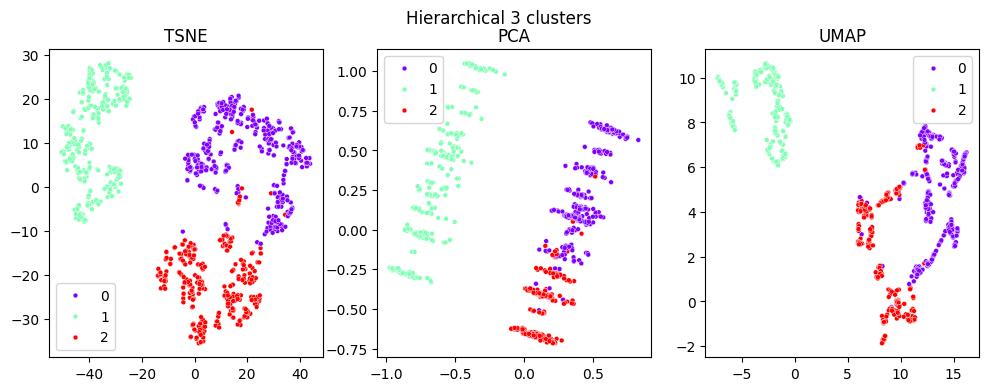

In [66]:
plot_clusters(tsne_data, pca_data, umap_data, title='Hierarchical 3 clusters', hue=labels_hierarchical_3_cl)

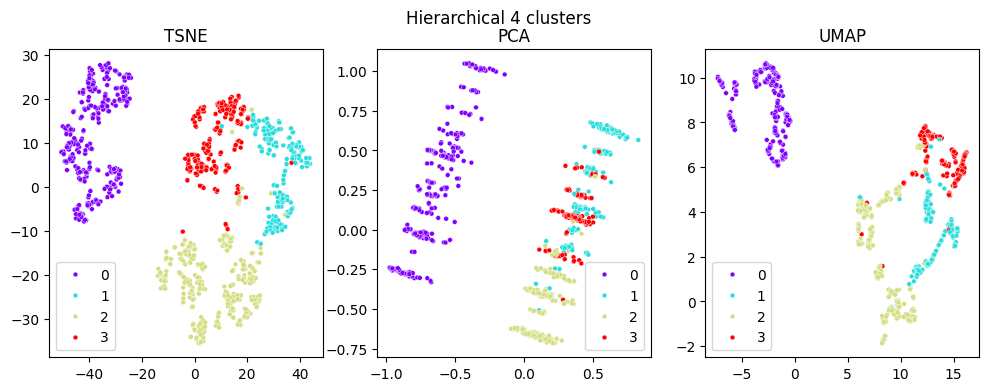

In [67]:
plot_clusters(tsne_data, pca_data, umap_data, title='Hierarchical 4 clusters', hue=labels_hierarchical_4_cl)

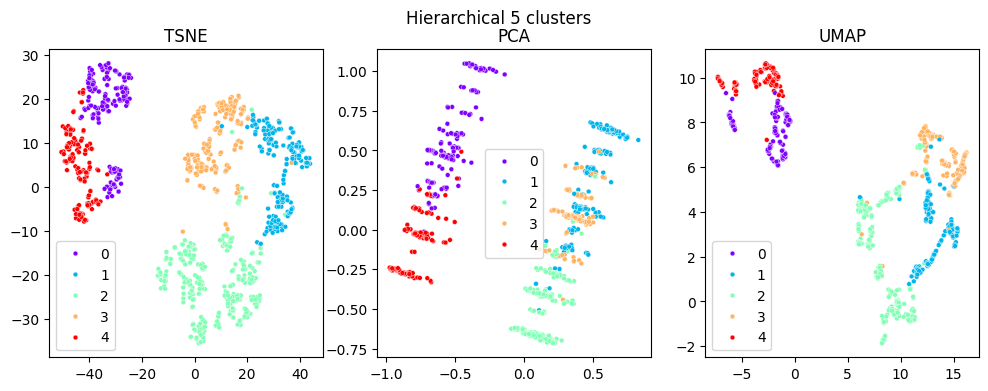

In [68]:
plot_clusters(tsne_data, pca_data, umap_data, title='Hierarchical 5 clusters', hue=labels_hierarchical_5_cl)

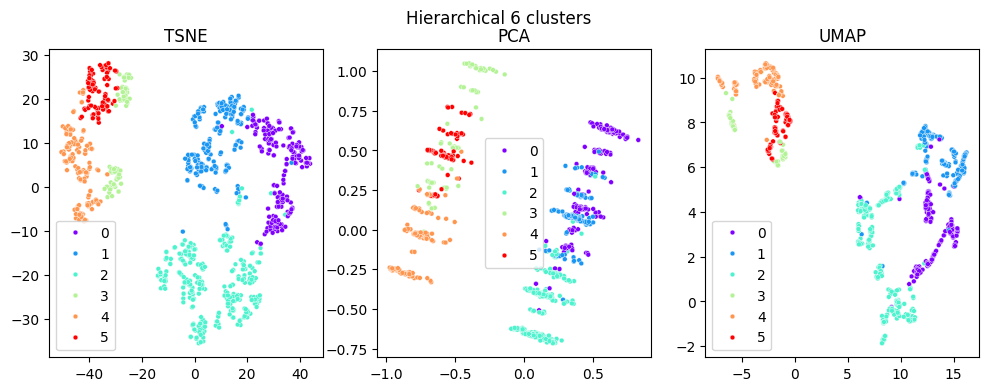

In [69]:
plot_clusters(tsne_data, pca_data, umap_data, title='Hierarchical 6 clusters', hue=labels_hierarchical_6_cl)

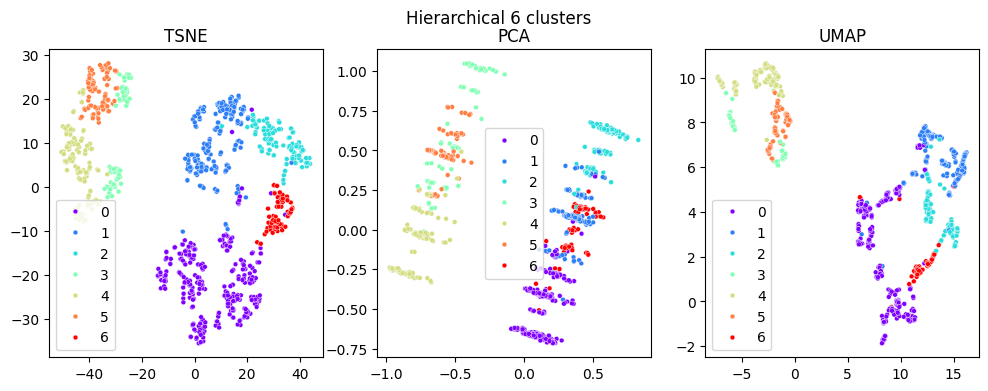

In [70]:
plot_clusters(tsne_data, pca_data, umap_data, title='Hierarchical 6 clusters', hue=labels_hierarchical_7_cl)

Субъективно, разбинение с 4 кластерами - наиболее удачное.

#### DBSCAN

Алгоритм кластеризации DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это метод, который находит кластеры на основе плотности точек. Вот как он работает поэтапно:

1. Определение параметров:
   - Вам необходимо установить два параметра:
     - eps (эпсилон): радиус, в пределах которого ищутся соседние точки.
     - minPts: минимальное количество точек, которые должны находиться в радиусе eps, чтобы считать область "плотной" и образовать кластер.

2. Выбор начальной точки:
   - Алгоритм начинает с произвольной точки данных, отметим её как текущую.

3. Нахождение соседей:
   - Алгоритм ищет все точки, которые находятся в радиусе eps от текущей точки. Эти точки называются "соседями".

4. Классификация точки:
   - Если количество соседей >= minPts, текущая точка считается "ядром" кластера. Если меньше, она становится "шумом" или "ненадежной" точкой.

5. Формирование кластера:
   - Если текущая точка — ядро, то создаётся новый кластер.
   - Алгоритм добавляет всех соседей к кластеру и переходит к следующей точке-соседу.

6. Рекурсивный растягивание:
   - Для каждой из соседних точек алгоритм снова ищет их соседей:
     - Если какая-то из соседей также является ядром, её соседей также добавляют в кластер.
     - Этот процесс продолжается, пока не будут обработаны все точке в пределах eps.

7. Обработка других точек:
   - Если текущая точка не является ядром, алгоритм переходит к следующей непроверенной точке данных и повторяет шаги 3-6.

8. Завершение:
   - Алгоритм завершает работу, когда все точки были обработаны. В результате вы получите один или несколько кластеров, а также выбросы (шум) — точки, которые не попали ни в один кластер.

Таким образом, DBSCAN позволяет находить кластеры различной формы и размера, несмотря на шум в данных, что делает его подходит для многих задач кластеризации.


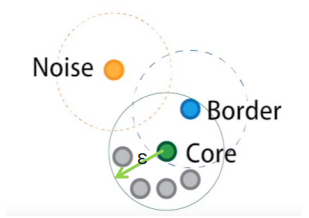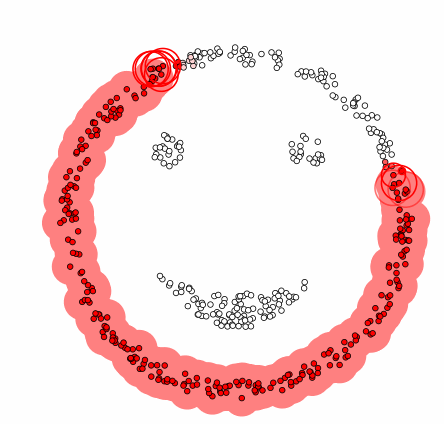

In [71]:
from sklearn.cluster import DBSCAN
import numpy as np

In [72]:
epsilons = np.arange(0.1, 2.1, 0.1)
epsilons

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [73]:
# dbscan = DBSCAN(eps= 0.5, min_samples = 5)
# dbscan.fit(scaled_df)
# dbscan_labels = dbscan.labels_
# dbscan_labels

Исследуем зависимость Silhouette Score от величины окрестности.

In [74]:
s_score = []
clusters = []

for epsilon in epsilons:
  dbscan = DBSCAN(eps= epsilon, min_samples = 5)
  dbscan.fit(scaled_df)
  dbscan_labels = dbscan.labels_
  unique_labels = np.unique(dbscan_labels)

  # Зашумленным выборкам (выбросам) присваивается метка -1.
  n_clusters = len(unique_labels[unique_labels != -1])

  if n_clusters > 1:
    silhouette = silhouette_score(scaled_df, dbscan_labels)
  else:
      # случай когда все данные в одном кластере
      silhouette = 0
  s_score.append(silhouette)
  clusters.append(n_clusters)

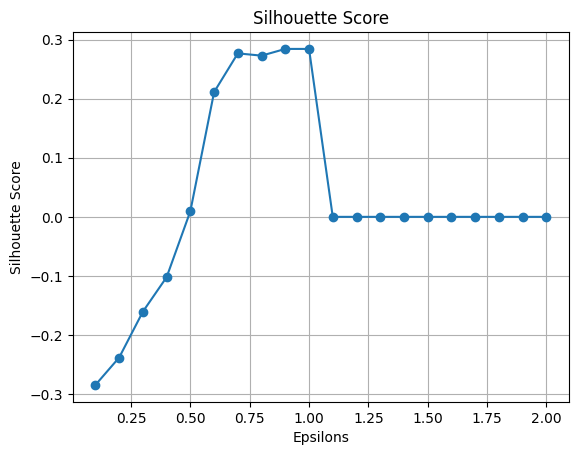

In [75]:
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Epsilons')
plt.plot(epsilons, s_score, marker = 'o')
plt.grid()

In [76]:
clusters

[4, 28, 29, 12, 10, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

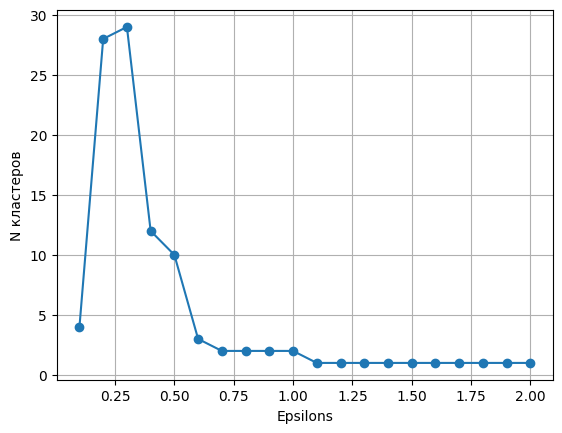

In [77]:
plt.plot(epsilons, clusters, marker='o')
plt.ylabel('N кластеров')
plt.xlabel('Epsilons')
plt.grid()

Видим, что при начиная с 0.7 данные разбиваются на 2 кластера.

Видим, что наибольшее значение Silhouette принимает при eps = 1. При этом получается 2 кластера.

Исследуем зависимость Silhouette Score от количества объектов в окрестности.

In [78]:
s_score = []
clusters = []

samples = np.arange(1, 51, 1)

for sample in samples:
  dbscan = DBSCAN(eps = 0.6, min_samples=sample)
  dbscan.fit(scaled_df)
  dbscan_labels = dbscan.labels_
  unique_labels = np.unique(dbscan_labels)
  n_clusters = len(unique_labels[unique_labels != -1])

  if n_clusters > 1:
    silhouette = silhouette_score(scaled_df, dbscan_labels)
  else:
    # случай когда все данные в одном кластере
    silhouette = 0

  s_score.append(silhouette)
  clusters.append(n_clusters)

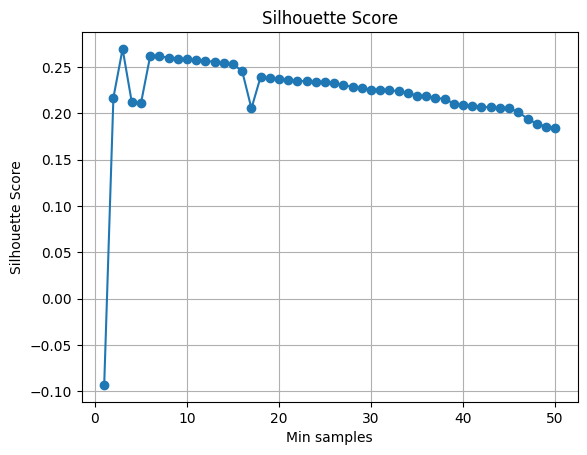

In [79]:
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Min samples')
plt.plot(samples, s_score, marker = 'o')
plt.grid()

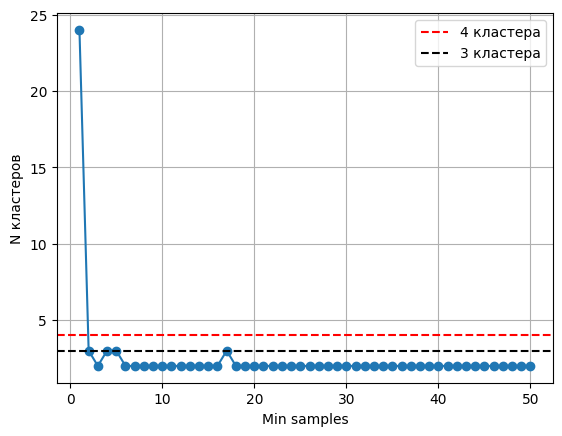

In [80]:
plt.plot(samples, clusters, marker='o')
plt.ylabel('N кластеров')
plt.xlabel('Min samples')
plt.axhline(y = 4, label = '4 кластера', color = 'red', linestyle= '--')
plt.axhline(y = 3, label = '3 кластера', color = 'black', linestyle= '--')
plt.legend()
plt.grid()

В ходе исследований было выяснено, что при любом эпсилон большем 0.7, количество кластеров всегда = 2, независимо от количества объектов в окрестности. При этом силует был равен примерно 0.28.

Лучшие результаты:

eps = 0.5, min_samples = 21 => 3 кластера, скор 0.075

eps = 0.6, min_samples = 2 => 3 кластера, скор 0.22

eps = 0.6, min_samples = 5 => 3 кластера, скор 0.21

eps = 1, min_samples = 5 => 2 кластера, скор 0.28

In [81]:
dbscan = DBSCAN(eps = 1, min_samples=5)
dbscan.fit(scaled_df)

DBSCAN(eps=1)

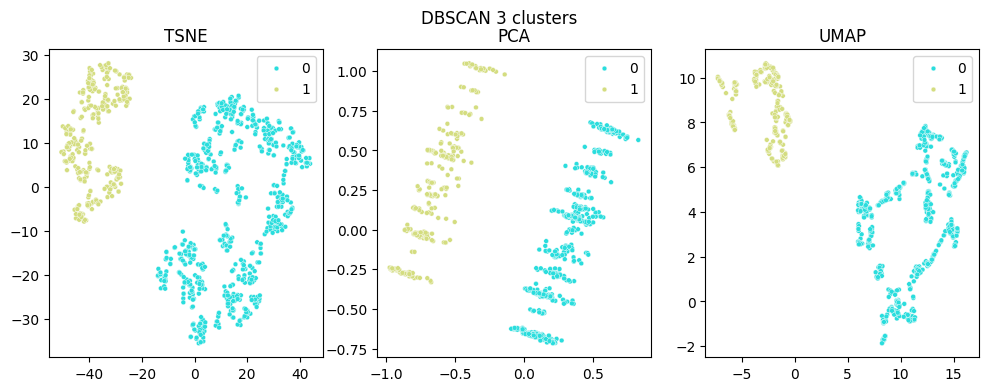

In [82]:
plot_clusters(tsne_data, pca_data, umap_data, title='DBSCAN 3 clusters', hue=dbscan.labels_)

In [83]:
silhouette_score(scaled_df, dbscan.labels_)

0.2842706352987602

### Интерпритация результатов

In [84]:
kmeans_5_cl = KMeans(n_clusters = 5, random_state=10, n_init='auto')
kmeans_5_cl.fit(scaled_df)
labels_kmeans_5_cl = kmeans_5_cl.labels_

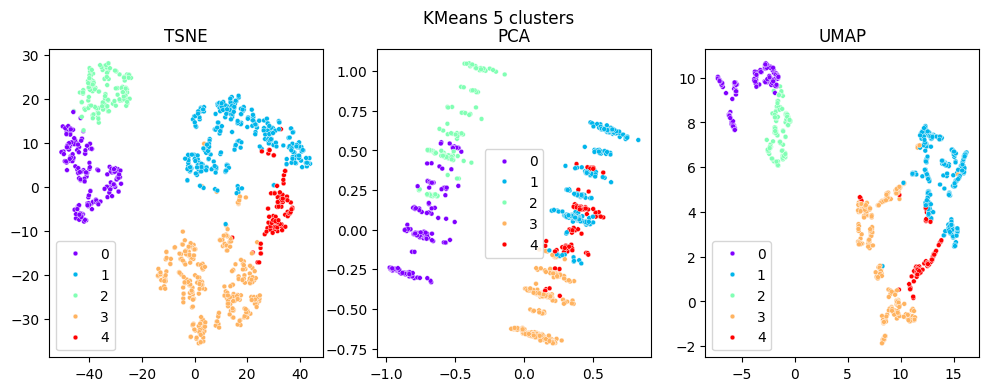

In [85]:
plot_clusters(tsne_data, pca_data, umap_data, title='KMeans 5 clusters', hue=labels_kmeans_5_cl)

In [86]:
df = pd.read_csv('german_credit_data.csv').iloc[:, 1:]
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,unknown,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [87]:
clustered_df = df.assign(Cluster = labels_kmeans_5_cl)
clustered_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,unknown,little,1169,6,radio/TV,4
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,unknown,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,3
4,53,male,2,free,little,little,4870,24,car,3


([<matplotlib.patches.Wedge at 0x7d1f1be0b2b0>,
 [Text(0.6154305139598077, 0.9117265393127301, '4'),
  Text(-1.0637016214251902, 0.28024785561609833, '0'),
  Text(-0.37910727504664393, -1.032607221554599, '1'),
  Text(0.6409594827728163, -0.8939636130422781, '3'),
  Text(1.0628159539486193, -0.28358816624162275, '2')],
 [Text(0.3356893712508042, 0.49730538507967087, '31.1%'),
  Text(-0.5802008844137401, 0.15286246669968998, '29.6%'),
  Text(-0.2067857863890785, -0.5632403026661448, '17.4%'),
  Text(0.34961426333062706, -0.4876165162048789, '13.6%'),
  Text(0.5797177930628832, -0.1546844543136124, '8.3%')])

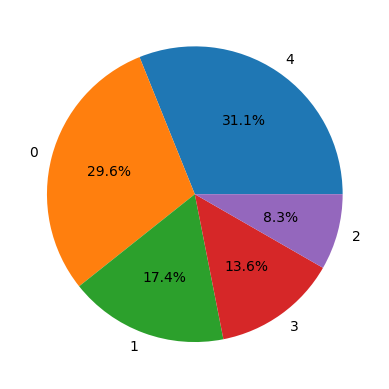

In [88]:
plt.pie(clustered_df['Cluster'].value_counts(), autopct='%1.1f%%', labels = clustered_df['Cluster'].unique())

In [91]:
cluster_means = clustered_df.groupby('Cluster').mean(numeric_only = True)

In [92]:
category_means = clustered_df.groupby('Cluster').agg({
                                    'Sex': lambda x: x.mode(),
                                    'Housing': lambda x: x.mode(),
                                    'Saving accounts': lambda x: x.mode(),
                                    'Checking account': lambda x: x.mode(),
                                    'Purpose': lambda x: x.mode()
                                    })

In [93]:
# Объединяем числовые и категориальные результаты
final_means = pd.concat([cluster_means, category_means], axis=1)
final_means

,Age,Job,Credit amount,Duration,Sex,Housing,Saving accounts,Checking account,Purpose
Cluster,,,,,,,,,
0,32.264368,1.821839,3135.482759,20.758621,female,own,little,little,car
1,38.405405,1.972973,3220.003378,20.324324,male,own,little,unknown,car
2,33.492647,1.852941,2548.058824,17.750000,female,own,little,unknown,radio/TV
3,35.446945,1.913183,3621.868167,22.720257,male,own,little,little,car
4,35.963855,1.879518,3609.951807,21.626506,male,own,unknown,moderate,"[car, radio/TV]"


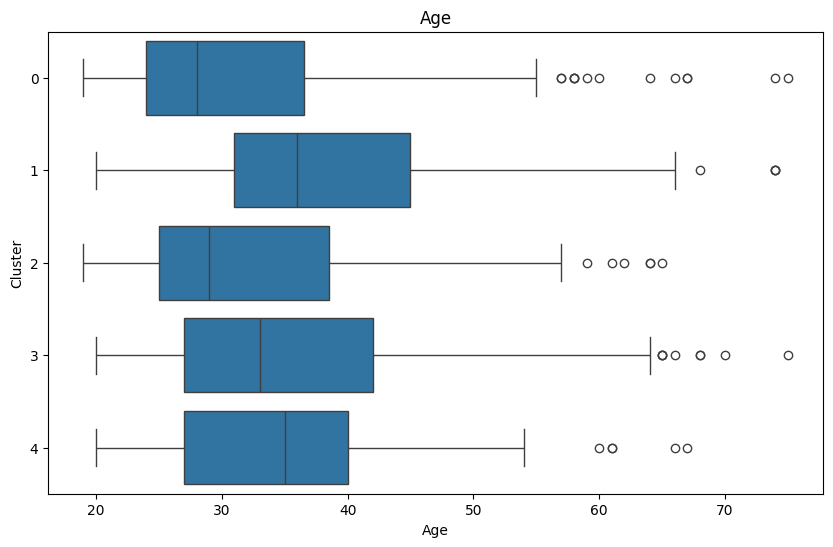

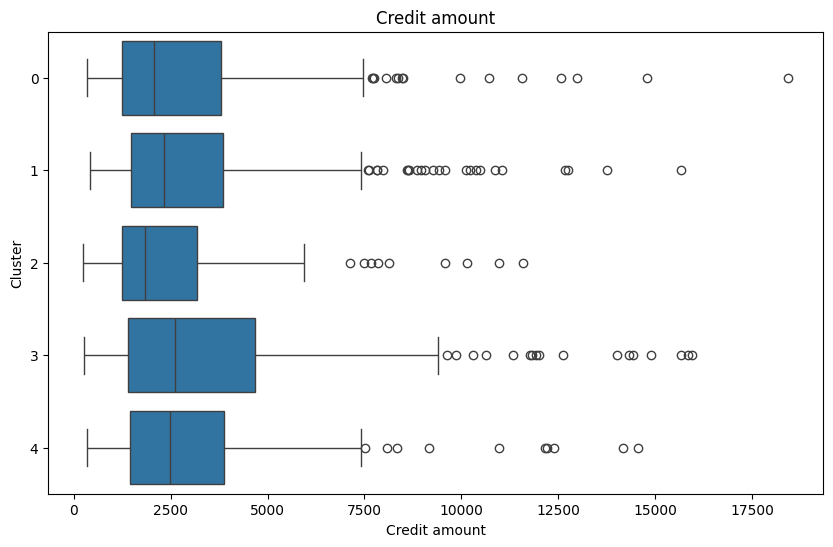

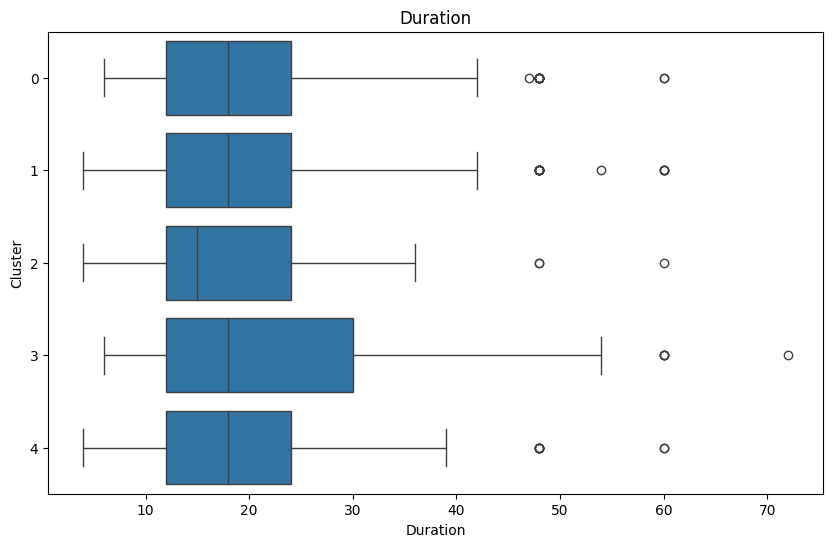

In [108]:
features = ['Age', 'Credit amount', 'Duration']

for feature in features:
    plt.figure(figsize=(10, 6))

    # Построение горизонтального boxplot
    sns.boxplot(x=feature, y='Cluster', data=clustered_df, orient='h')

    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Cluster')
    plt.show()

<ipython-input-89-b1850c7f2655>:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=clustered_dist, x=clustered_dist.columns[i], hue=clustered_df['Cluster'], palette=sns.palettes.mpl_palette('Dark2'))
<ipython-input-89-b1850c7f2655>:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=clustered_dist, x=clustered_dist.columns[i], hue=clustered_df['Cluster'], palette=sns.palettes.mpl_palette('Dark2'))
<ipython-input-89-b1850c7f2655>:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=clustered_dist, x=clustered_dist.columns[i], hue=clustered_df['Cluster'], palette=sns.palettes.mpl_palette('Dark2'))
<ipython-input-89-b1850c7f2655>:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=clustered_dist, x=clustered_dist.columns[i], hue=

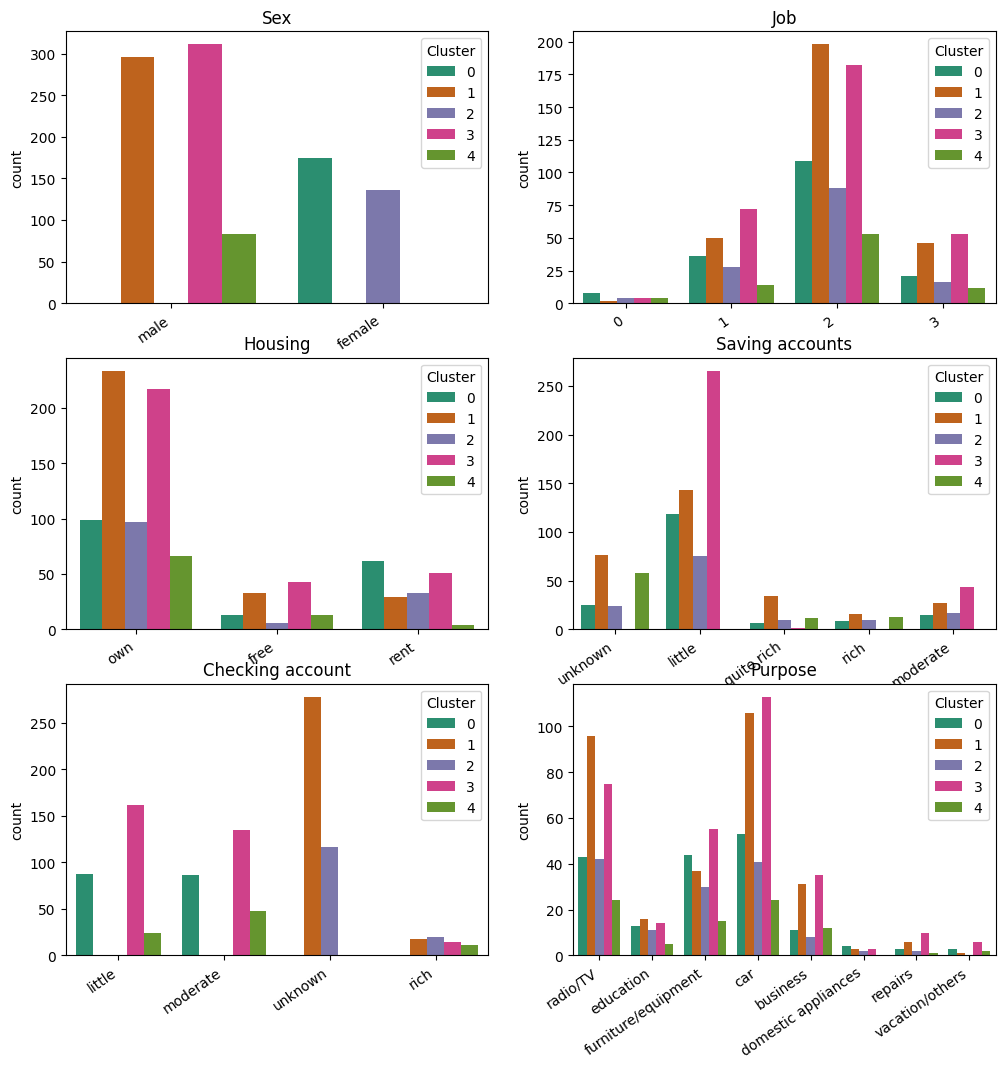

In [89]:
plt.figure(figsize=(12, 12))
clustered_dist = clustered_df.drop(['Age', 'Credit amount', 'Duration', 'Cluster'], axis=1)
# clustered_dist
for i, col in enumerate(clustered_dist.columns):
    plt.subplot(3, 2, i+1).set_title(col)
    sns.countplot(data=clustered_dist, x=clustered_dist.columns[i], hue=clustered_df['Cluster'], palette=sns.palettes.mpl_palette('Dark2'))
    plt.xticks(rotation=35, ha='right')
    plt.xlabel('  ')

Кластеры 0 и 2 включают женщин со средним возрастом от 32 до 33 лет. Эти женщины образованные и имеют собственное жильё. У них небольшие накопления на сберегательных и текущих счетах.

Что касается кредитов, то средняя сумма для женщин из 0 кластера составляет 3125 марок, а для 2 кластера — 2548 марок. Основная цель кредитования для женщин из 0 кластера — покупка автомобиля, тогда как для 2 кластера это чаще всего радио и телевизоры. Также стоит отметить, что средний срок кредита для женщин из 0 кластера составляет почти 21 год, а для женщин из 2 кластера — 18 лет.

Таким образом, 0 и 2 кластеры заметно отличаются по средним суммам кредитов и их целям, однако в других аспектах они весьма схожи. К тому же, женщин во 2 кластере немного меньше, чем в 0.

Что касается кластеров 1, 3 и 4, то это мужчины. Средний возраст мужчин из 1 кластера — 38 лет, а для мужчин из 3 и 4 кластеров — 35 лет. Все они также образованные. Средняя сумма кредита для мужчин 1 кластера — 20 лет, в то время как для 3 и 4 кластеров — 23 и 22 года соответственно. Цель их кредитов в основном одна и та же: покупка автомобиля или бытовой техники.

Мужчины из кластеров 3 и 4 очень похожи, за исключением состояния текущих счетов: у мужчин из 4 кластера значительно больше средств на счетах, чем у мужчин из 3 кластера.

Кроме того, мужчины из 1 кластера в среднем старше на 3 года и берут меньшую сумму кредита. По количеству мужчин кластеры 1 и 3 примерно одинаковы, а мужчин из 4 кластера намного меньше.

В целом, разделение на кластеры можно назвать удачным.